In [1]:
from fastai.collab import *
from fastai.tabular.all import *
from time import *
from sklearn import *

In [2]:
path = Path('.')
df = pd.read_csv(path/'training_data_v2.csv', delimiter=',', engine='python',
                     header=0)

In [3]:
cloud_levels = 'overcast clouds', 'broken clouds', 'scattered clouds', 'few clouds', 'clear sky'

In [4]:
#df['cloud'] = df['cloud'].astype('category')
#df['cloud'].cat.set_categories(cloud_levels, ordered=True, inplace=True)
df['morning_cloud'] = df['morning_cloud'].astype('category')
df['noon_cloud'] = df['noon_cloud'].astype('category')
df['afternoon_cloud'] = df['afternoon_cloud'].astype('category')
df['morning_cloud'].cat.set_categories(cloud_levels, ordered=True, inplace=True)
df['noon_cloud'].cat.set_categories(cloud_levels, ordered=True, inplace=True)
df['afternoon_cloud'].cat.set_categories(cloud_levels, ordered=True, inplace=True)

In [5]:
df.drop(labels='date', axis=1, inplace=True)
df.head()

,morning_temp,morning_wind,morning_humidity,morning_rain,morning_cloud,noon_temp,noon_wind,noon_humidity,noon_rain,noon_cloud,afternoon_temp,afternoon_wind,afternoon_humidity,afternoon_rain,afternoon_cloud,daily_power
0,11.846154,19.384615,90.769231,no rain,overcast clouds,12.900000,19.000000,88.600000,no rain,overcast clouds,13.076923,27.000000,87.538462,rain,overcast clouds,5.6
1,8.071429,15.214286,84.285714,no rain,broken clouds,8.555556,19.333333,79.333333,no rain,broken clouds,6.071429,17.285714,76.214286,no rain,clear sky,2.5
2,6.857143,32.500000,80.428571,no rain,broken clouds,10.700000,43.100000,82.200000,rain,few clouds,9.642857,32.071429,74.071429,no rain,broken clouds,7.6
3,7.000000,28.714286,67.785714,no rain,broken clouds,7.700000,25.200000,67.500000,no rain,broken clouds,7.785714,26.142857,76.357143,no rain,broken clouds,15.1
4,9.384615,40.230769,81.461538,rain,broken clouds,8.777778,41.111111,69.888889,no rain,broken clouds,6.444444,38.333333,73.777778,no rain,broken clouds,13.1


In [6]:
cont_df,cat_df = cont_cat_split(df, max_card = 15, dep_var = 'daily_power')

In [7]:
procs_nn = [Categorify, Normalize]
splits = RandomSplitter(0.1)(range_of(df))

In [8]:
to_dt = TabularPandas(df, procs_nn, cat_df, cont_df, splits=splits, y_names='daily_power')

In [9]:
len(to_dt.train), len(to_dt.valid)

(2576, 286)

In [10]:
xs,y = to_dt.train.xs, to_dt.train.y
valid_xs, valid_y = to_dt.valid.xs, to_dt.valid.y

In [11]:
m = tree.DecisionTreeRegressor(min_samples_leaf=60)
m.fit(xs,y)

DecisionTreeRegressor(min_samples_leaf=60)

In [12]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [13]:
m_rmse(m, xs, y)

6.611507

In [14]:
m_rmse(m, valid_xs, valid_y)

6.752449

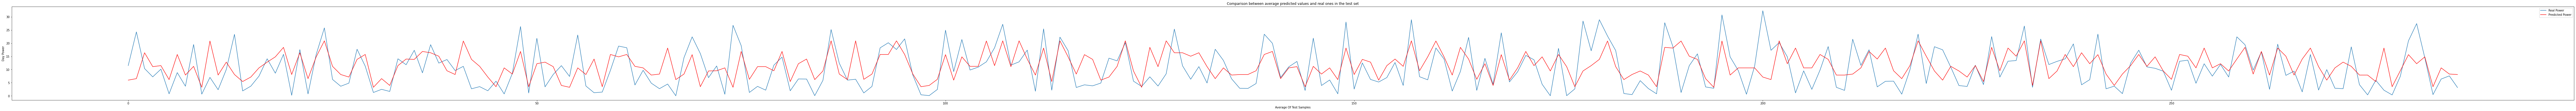

In [15]:
plt.figure(figsize=(160,6))
plt.plot(range(len(valid_y)), valid_y)
plt.plot(range(len(m.predict(valid_xs))), m.predict(valid_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.show()

In [16]:
def rf(xs, y, n_estimators=100, max_samples=500, max_features=0.5, min_samples_leaf=5, **kwargs):
    return ensemble.RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples,
                                max_features=max_features, min_samples_leaf=min_samples_leaf,
                                oob_score=True).fit(xs, y)

In [17]:
trees = rf(xs, y)

In [18]:
m_rmse(trees, xs, y)

6.241159

In [19]:
m_rmse(trees, valid_xs, valid_y)

6.747376

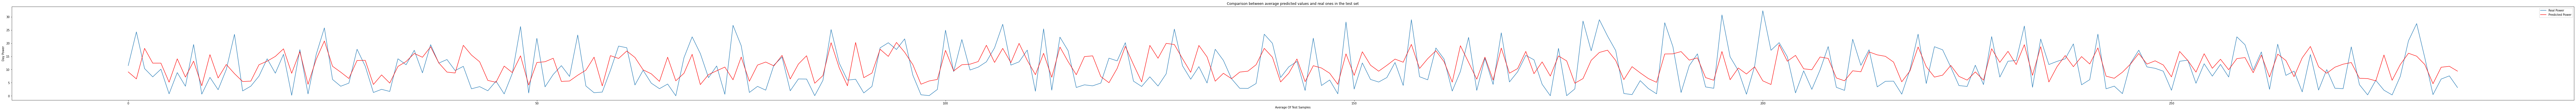

In [20]:
plt.figure(figsize=(160,6))
plt.plot(range(len(valid_y)), valid_y)
plt.plot(range(len(trees.predict(valid_xs))), trees.predict(valid_xs), 'r')
plt.title('Comparison between average predicted values and real ones in the test set')
plt.ylabel('Day Power')
plt.xlabel('Average Of Test Samples')
plt.legend(['Real Power', 'Predicted Power'])
plt.show()